


uoa-logo.svg



COMPSYS 306 Artificial Intelligence and Machine Learning 

#<center> **COMPSYS 306 Artificial Intelligence and Machine Learning**
#<center> *Department of Electrical, Computer, and Software Engineering*
<center> The University of Auckland, New Zealand


<center>Waleed Abdulla, Kevin I-Kai Wang and Felix Marattukalam 


**Lab 4: The Application of the Support Vector Machine**


  


In [ ]:
#Note: Changing the the sign-off time here will make no difference to the actual sign-off time! But, feel free to change it here for visual satisfaction!  
%%html
<marquee style='width: 30%; color: red;'><b>Lab Start: Week 7: Sep 12 , 2022 -----> Lab Sign-off: Week 7: on September 16, 2022 (2:00 pm) </b></marquee>

**Prerequisites:**

- Completion of Lab 1, Lab 2 and Lab 3 with signoff from TA/GTA also ensuring the (.ipynb) notebook with all your answers are uploaded to Canvas.
- Understanding of regression, classification and its implementation using Python libraries.
- Knowledge of the working of an Artificial Neural Network (ANN).
- Keen interest to learn about Artificial Intelligence (AI) and Machine Learning (ML).


**Step 1: Understanding SVM in general**


Open this ipython notebook using Google Colab

- Similar to what was done in Lab 1, Lab 2 and Lab3, we will upload this notebook to Google Colab. If you havent done this already, you would not be reading this text. 

- In Lab 3, we saw the working of a Multilayer Perceptron, now we will proceed to learna new technique called the Support Vector Machines (SVMs).


What are Support Vector Machines?

SVMs are **machine learning** algorithms that can be used for both classification and regression. SVMs are one of the most powerful machine learning algorithms used for classification, regression and outlier detection purposes. A model is built by SVM classifier that assigns new data points to one of the given categories (or classes). Thus, it can be viewed as a non-probabilistic binary linear classifier.

Although a SVM can solve both classification and regression problems, it is mostly used for classification problems in machine learning (ML).  SVM models help in classifying new data points based on the previously seen training data, making it a supervised machine learning technique. 


In 1963, Vladimir N. Vapnik and Alexey Ya. Chervonenkis invented SVMs after which SVMs have been very popular in text, hypertext and image classification.
SVMs can work with a wide variety of data ranging from handwritten characters to sorting proteins in biology labs.



A small recap of **classification** in Machine Learning.

Classification is a ML task that requires machine learning algorithms to learn how to assign a class label to examples from a problem domain. An easy-to-understand example is classifying emails as “spam” or “not spam”.

We have already performed some classification tasks in Lab 2 and Lab 3 and saw that supervised classification models require labelled input data to learn and understand, and then to estimate the best way of classifying or mapping the new input data.

There are three common types of classification:


 1. Binary Classification: Two class labels, e.g. spam/not-spam, 0/1.
 2. Multi-Class Classification: More than two class labels are present, e.g. cat, dog, fish, bird.
 3. Multi-Label Classification: Each instance can be assigned with multiple class labels, e.g. cat, lion, carnivore, mammal.

In general, a support vector machine, as a classifier, aims to find a decision boundary which is also sometimes referred to as a decision hyperplane. Topic 6 from lectures gives you an idea about what linearly separable and non-linearly separable data points are, the concept of decision boundary, and hyperplanes.
 
Intuitively, a good separation is achieved by the decision hyperplane that has the longest distance to the nearest training-data points of both classes (i.e. assuming a binary classifier). Refer to topic 6 of the lectures for more conceptual understanding on the decision boudary and distance to decision boundary.


Let us briefly recap the working of SVM with the help of an example similar to what we saw in Lab 3.

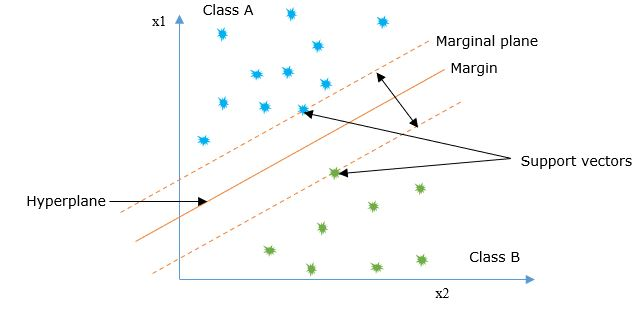

In the figure above, an ideal SVM classifier can be visualized on a 2-dimensional (2D) plane. Here, there are two classes denoted by markers in the colours blue and green. Let us assign the blue class as negative class and the green class as positive class.

The SVM aims to find a line in this 2D input space or a decision hyperplane in multidimensional input space that linearly separates the two classes.

The hyperplane separates (or classifies) input data points based on their values. As shown in the example above, there can be an infinite number of possible decision hyperplane. What is the best decision boundary to separate the classes and how do we find it? This is where margin and support vectors come into play.

In addition to the decision boundary, there can be found two additional hyperplanes called marginal planes, which are precisely parallel to the decision boundary in such a way that the marginal planes pass through at least one of the nearest points from the respective class. These nearest points through which the two marginal planes pass are called the support vectors. Refer to the figure above, the decision hyperplane is denoted by the solid orange line and the marginal hyperplanes are denoted by the dotted orange lines.

The optimal decision boundary would be the one that has the maximum distance to each marginal hyperplane. The distance between the two parallel marginal hyperplanes is known as the margin. Hence, the SVM algorithm works on maximizing the margin.

From Lab 2, we already know that there are two types of classification problems concerning data distribution: linearly separable and non-linearly separable. Two sets are linearly separable if there exists at least one straight line in the input space where all the blue points are on one side of the line and all the green points are on the other side.

Non-linearly separable classification problems are the ones where data points cannot be separated with a straight line or a straight hyperplane. In such a situation, SVM kernels can be used to convert low dimensional space into a higher dimensional space so that the data points (now feature points) become linearly separable.

Follow the below video to better visualize the above concept of converting a lower dimensional data into a higer dimension so that the data points can be separated with the help of a hyperplane. 

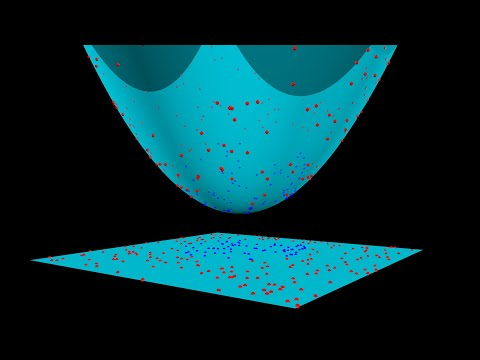

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('OdlNM96sHio')

**Step 2: SVM Foundations** 

We saw the SVM works on the basis of an optimal decision boundary to separate the classes. From the lectures, we know that a good decision boundary should have the following features:

- Not favour a specific class
- Be robust to perturbations
- Does not overfit

A linear decision boundary (or the hyperplane) is defined as


\begin{align}
f(x)=w^{T}x+b=0
\end{align}

where $w$ is a vector of coefficients that corresponds to each input attribute and orthogonal to the hyperplane. $b$ is the bias, we know what bias is from Lab 2.

\begin{align}
y=sign(f(x_i))
\end{align}

where the value of $y$ associated with input $x_i$ indicates whether the classification output is in a positive class *blue* or the negative class *green*.

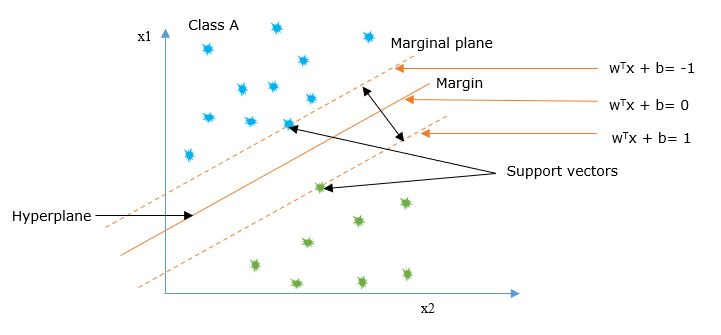

From the figure above, we are expecting the output of the classifier equation to be either a positive number indicating the data point belongs to a positive class or a negative number indicating the data point belongs to a negative class. If any point lies exactly on the decision boundary, then the output of the classifier would be zero. 

Accordingly, the equation for the decision hyperplane would be 

\begin{align}
y=w^{T}x+b = 0
\end{align}

And the equation for the two marginal hyperplanes would be 

\begin{align}
y=w^{T}x+b = -1
\end{align}

and 

\begin{align}
y=w^{T}x+b = 1 
\end{align}



Now, the margin has to be maximized to find the **optimal** decision boundary. Consider the negative support vector as the blue point and the positive support vector as the green point. The margin would be simply the distance between the two marginal planes defined by a set of blue and green points. Mathematically, we have two equations with two unknowns. To find the unknowns, subtract one equation from another.


\begin{align}
w^{T}x_1+b = 1 
\end{align}

\begin{align}
w^{T}x_2+b = -1 
\end{align}

and we get 

\begin{align}
w^{T}(x_1-x_2) = 2 
\end{align}

To find $x1-x2$, $w$ has to be sent to the equation's left-hand side, which gives 2 over $w$. It is already known that $w$ is a vector, and vectors can not be divided directly like a scalar value. The equivalent would be to divide both sides by the length of $w$, that is, the magnitude of that norm of $w$.



\begin{align}
\frac{w^T}{\| \mathbf{w} \|}\ (x_1-x_2)= \frac{2}{\| \mathbf{w} \|} 
\end{align}

When $w$ is divided by its normal form, it still points in the same direction, but the magnitude would be 1 unit equivalent to scalar 1. Hence,

\begin{align}
M = (x_1-x_2)= \frac{2}{\| \mathbf{w} \|} 
\end{align}

Now that we have arrived at the equation for the margin $(M)$, we need to optimize the margin, which can be easily solved by many existing approaches ( e.g. Gradient Descent). *Refer to the optimal margin slide of Topic 6 from the lectures.* 

If we refer back to slide 8 from the lecture (topic 6), we know that the maximum margin is defined by a set of closest points to the decision boundary which are also known as the support vectors. The solution of the optimization problem can be determined solely based on these support vectors (because they dictates the maximum margin).



When the data distribution is linearly separable, you can find a decision boundary that perfectly separates the data into their respective classes. However, if the training data contain errors or outliers, finding an optimal decision boundary may result in an overfitted model (refer to slide 14 of Topic 6). Therefore, soft margin SVM is proposed to find a decision boundary while tolerating some errors in training data. 

1. Soft Margin: The margin which can accommodate some percentage of error is known as soft margin and is less sensitive to outliers.

2. Hard Margin: The margin which is intolerant to any errors is known as hard margin. It is sensitive to outliers, and a single outlier can affect the decision boundary.

For soft margin, you can have larger margin if some errors can be tolerated. 

Most importantly, the concept of error (loss function) needs to be introduced into SVM through the slack variable $ξ_i$.

Based on the error, the two possibilities are: 

- Misclassification

\begin{align}
\frac{ξ_i}{\| \mathbf{w} \|}> \frac{2}{\| \mathbf{w} \|}
\end{align}


- Margin violation

\begin{align}
\frac{ξ_i}{\| \mathbf{w} \|}< \frac{1}{\| \mathbf{w} \|}
\end{align}


As such, the constraint becomes 

\begin{align}
y_i(w^{T}x_i+b)≥1-ξ_i
\end{align}

The magnitude of $ξ_i$ is essentially representing the error of the point $x_i$

With the updated constraint, the optimization problem now becomes

\begin{align}
\min_{w,b,ξ}\frac{\| \mathbf{w} \|^2}{2}+ C \sum_{i=1}^{n}ξ_i\
\end{align}

$C$ is a regularization parameter (i.e. a hyperparameter) that decides the trade-off between maximizing the margin and minimizing the training error. 


*Refer to Topic 6 slide 16 onwards to understand the concept of soft margin and  regularization parameter from the lectures*

**Step 3: SVM Kernels.** 

SVM is easy when building a hyperplane for linearly separable data points. However, it is more challenging when the data is non-linearly separable. As discussed, SVM kernels help in converting low dimensional non-linearly separable data points into high dimensional linearly separable data points. There are three widely used SVM kernels:

1. Polynomial
2. Radial Basis Function (RBF)
3. Sigmoid


Let’s build upon the intuition of how kernels work by converting 1D non-linearly separable data into 2D linearly separable data.



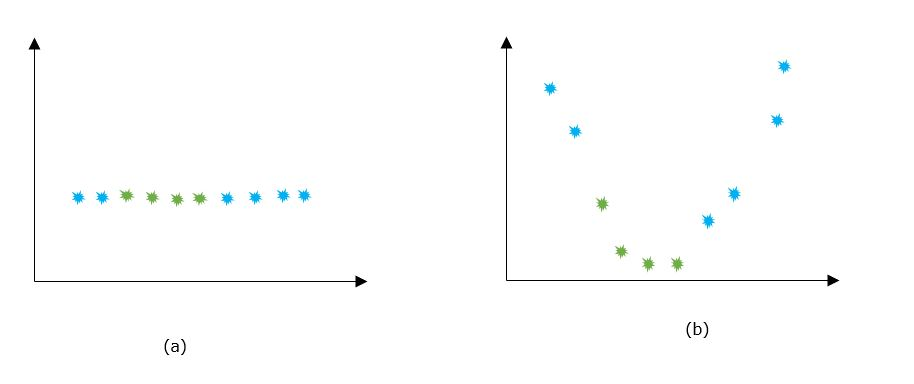

Consider the above data points in (a), and it is an example of the binary classification ( blue and green). It is impossible to draw a straight line that can separate the two classes perfectly. Applying a transformation on each point will convert 1D data points into 2D helping build a decision boundary. Here, the transformation function can be:

\begin{align}
f(x)=x^2
\end{align}

That is, square each of the data points and plot the result in 2D. Now, the data points are easily separable by drawing a linear hyperplane. 


**Step 4: SVM Examples using Python Libraries.** 

Below is an example of a linear SVM

For a simple linear example, we'll just make some dummy data and that will act in the place of importing a dataset.



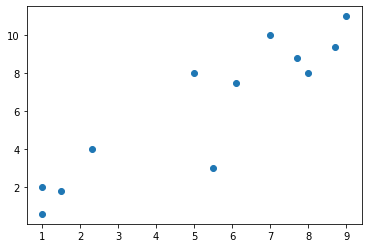

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

X = np.array([1, 5, 1.5, 8, 1, 9, 7, 8.7, 2.3, 5.5, 7.7, 6.1])
y = np.array([2, 8, 1.8, 8, 0.6, 11, 10, 9.4, 4, 3, 8.8, 7.5])

# show unclassified data
plt.scatter(X, y)
plt.show()

We'll do a bit of pre-processing on the already structured code. This will put the raw data into a format that we can use to train the SVM model and then create the SVM model using a linear kernel.

In [ ]:
# shaping data for training the model
training_X = np.vstack((X, y)).T
training_y = [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]

# define the model
clf = svm.SVC(kernel='linear', C=1.0)

# train the model
clf.fit(training_X, training_y)

SVC(kernel='linear')

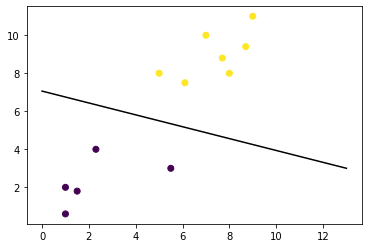

In [ ]:
# get the weight values for the linear equation from the trained SVM model
w = clf.coef_[0]

# get the y-offset for the linear equation
a = -w[0] / w[1]

# make the x-axis space for the data points
XX = np.linspace(0, 13)

# get the y-values to plot the decision boundary
yy = a * XX - clf.intercept_[0] / w[1]

# plot the decision boundary
plt.plot(XX, yy, 'k-')

# show the plot visually
plt.scatter(training_X[:, 0], training_X[:, 1], c=training_y)

plt.show()

Non-Linear SVM Example



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import svm

In [ ]:
# non-linear data
circle_X, circle_y = datasets.make_circles(n_samples=300, noise=0.05)

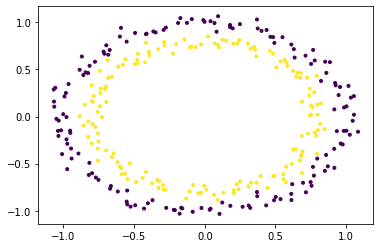

In [ ]:
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, marker='.')
plt.show()

In [ ]:
# make non-linear algorithm for model
nonlinear_clf = svm.SVC(kernel='rbf', C=1.0)

In [ ]:
# training non-linear model
nonlinear_clf.fit(circle_X, circle_y)

SVC()

In [ ]:
# Plot the decision boundary for a non-linear SVM problem
def plot_decision_boundary(model, ax=None):
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)

	# shape data
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    
	# get the decision boundary based on the model
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary
    ax.contour(X, Y, P,
               levels=[0], alpha=0.5,
               linestyles=['-'])

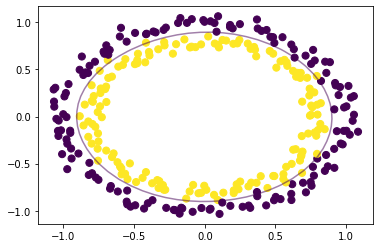

In [ ]:
# plot data and decision boundary
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, s=50)
plot_decision_boundary(nonlinear_clf)
plt.scatter(nonlinear_clf.support_vectors_[:, 0], nonlinear_clf.support_vectors_[:, 1], s=50, lw=1, facecolors='none')
plt.show()

**Step 5: SVM classifier implementation on IRIS flower database.** 



In [ ]:
#Importing libraries
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [ ]:
# import iris data to model Svm classifier
iris_dataset = datasets.load_iris()

Using the DESCR key over the iris_dataset, we can get description of the dataset

In [ ]:
print ("Iris data set Description :: ", iris_dataset['DESCR'])

Iris data set Description ::  .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== 

In [ ]:
print ("Iris feature data :: ", iris_dataset['data'])

Iris feature data ::  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2

In [ ]:
print ("Iris target :: ", iris_dataset['target'])

Iris target ::  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Visualizing the Iris dataset

*Note that we are taking two features at a time (sepal width-sepal length, and petal width-petal length) so that they can be visualized on a 2D plane.*



Visualizing the relationship between sepal and target classes

To visualize the Sepal length, width and corresponding target classes we can create a function with name visuvalize_sepal_data. At the beginning, we are loading the iris dataset to iris variable. Next, we are storing the first 2 features in iris dataset which are sepal length and sepal width to variable x. Then we are storing the corresponding target values in variable y.

As we have seen target variable contains values like 0, 1, 2 each value represents the iris flower species type. Then we are plotting the points on XY axes, where X-axis are Sepal Length values and Y-axis are the Sepal Width values

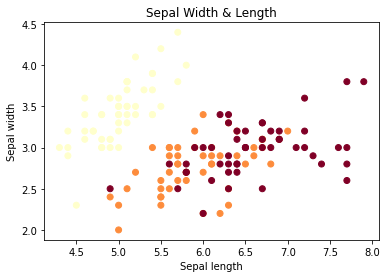

In [ ]:
def visuvalize_sepal_data():
	iris = datasets.load_iris()
	X = iris.data[:, :2]  # we only take the first two features.
	y = iris.target

	plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.get_cmap('YlOrRd'))
	plt.xlabel('Sepal length')
	plt.ylabel('Sepal width')
	plt.title('Sepal Width & Length')
	plt.show()
 
visuvalize_sepal_data()

Visualizing the relationship between Petal and target classes

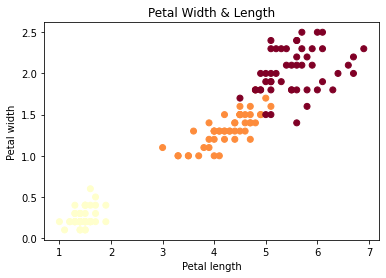

In [ ]:
def visuvalize_petal_data():
	iris = datasets.load_iris()
	X = iris.data[:, 2:]  # we only take the last two features.
	y = iris.target
	plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.get_cmap('YlOrRd'))
	plt.xlabel('Petal length')
	plt.ylabel('Petal width')
	plt.title('Petal Width & Length')
	plt.show()
 
visuvalize_petal_data()

As we have successfully visualized the behavior of target class (iris species type) with respect to Sepal length and width as well as with respect to Petal length and width, let’s now model different kernel SVM classifiers by considering only the Sepal features (Length and Width) or only the Petal features (Length and Width).

Visualizing the modeled SVM classifiers with iris Sepal features

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the Sepal two features.
y = iris.target
C = 1.0  # SVM regularization parameter

# SVC with linear kernel
svc = svm.SVC(kernel='linear', C=C, random_state=0,max_iter=10000).fit(X, y)
# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C,max_iter=10000).fit(X, y)
# SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C, max_iter=10000).fit(X, y)
# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', degree=3, C=C, max_iter=10000).fit(X, y)

SVM classifier parameters:

SVM classifier takes a few key hyperparameters that allow us to grossly and finely tune our model to fit our data best.

Some hyperparameters used are as follows:

kernel: e.g."linear", "rbf"

C: (0, inf): Controls the trade-off between smooth decision boundary and minimizing training misclassification.

gamma: (0, inf): Kernel coefficient; controls 'fitness' of model to training data.

More details about scikit learn SVM parameters can be found at https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

To model different kernel SVM classifier using the iris Sepal features, first, we loaded the iris dataset into iris variable like as we have done before. Next, we are loading the sepal length and width values into X variable, and the target values are stored in y variable. Once we are ready with data to model the SVM classifier, we are just calling the scikit-learn SVM module function with different kernels.

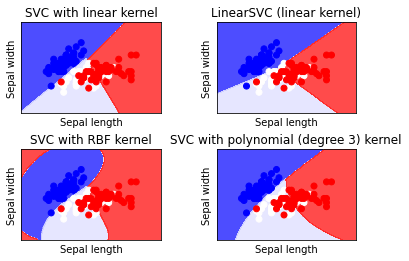

In [ ]:
h = .02  # step size in the mesh
 
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
	                     np.arange(y_min, y_max, h))
# title for the plots
titles = ['SVC with linear kernel',
	   'LinearSVC (linear kernel)',
	    'SVC with RBF kernel',
	    'SVC with polynomial (degree 3) kernel']
 
 
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
	 # Plot the decision boundary. For that, we will assign a color to each
	 # point in the mesh [x_min, x_max]x[y_min, y_max].
	 plt.subplot(2, 2, i + 1)
	 plt.subplots_adjust(wspace=0.4, hspace=0.4)
 
	 Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
	 # Put the result into a color plot
	 Z = Z.reshape(xx.shape)
	 plt.contourf(xx, yy, Z, cmap=plt.cm.get_cmap('bwr'), alpha=0.8)
 
	 # Plot also the training points
	 plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.get_cmap('bwr'))
	 plt.xlabel('Sepal length')
	 plt.ylabel('Sepal width')
	 plt.xlim(xx.min(), xx.max())
	 plt.ylim(yy.min(), yy.max())
	 plt.xticks(())
	 plt.yticks(())
	 plt.title(titles[i])
 
plt.show()

Modeling different kernel SVM classifier using Iris petal features

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the last two features.
y = iris.target
C = 1.0  # SVM regularization parameter
 
# SVC with linear kernel
svc = svm.SVC(kernel='linear', C=C, max_iter=10000).fit(X, y)
# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C).fit(X, y)
# SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C, max_iter=10000).fit(X, y)
# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', degree=3, C=C, max_iter=10000).fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


The above code is much similar to the previously modeled SVM classifier code. The only difference is loading the Petal features into X variable. The remaining code is from the previously modeled SVM classifier code.

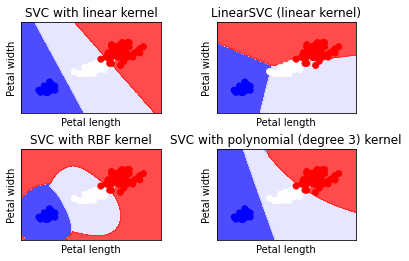

In [ ]:
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
	            np.arange(y_min, y_max, h))
# title for the plots
titles = ['SVC with linear kernel',
	  'LinearSVC (linear kernel)',
	  'SVC with RBF kernel',
	  'SVC with polynomial (degree 3) kernel']
 
 
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.get_cmap('bwr'), alpha=0.8)
 
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.get_cmap('bwr'))
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
 
plt.show()

**Step 6: Implementation of a SVM classifier for an Image database.** 

This step introduces some new concepts that are essential for SVM implementation. E.g. storing data in pickle format, resizing an image, transformation of an image and so on. Therefore, please ensure you go through the complete code before attempting the forthcoming tasks.

*Ref: https://github.com/ShanmukhVegi/Image-Classification*

To start with we will be importing all the required packages. Some of these packages have been used by you in the previous labs and some are new.

In [ ]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle

This implementation in default has three categories, namely 'cars','Ice cream cone' and 'cricket ball'. 

The user can choose by giving an input as 'y or n' to select if they want to go by the default category or a new custom category. For explanation purposes we will stick to the default category mentioned above.   

In [ ]:
Categories=['Cars','Ice cream cone','Cricket ball']
print("Type y to give categories or type n to go with classification of Cars,Ice Cream cone and Cricket ball");

while(True):
  check=input()
  if(check=='n' or check=='y'):
    break
  print("Please give a valid input (y/n)")
if(check=='y'):
  print("Enter How Many types of Images do you want to classify")
  n=int(input())
  Categories=[]
  print(f'please enter {n} names')
  for i in range(n):
    name=input()
    Categories.append(name)
  print(f"If not drive Please upload all the {n} category images in google collab with the same names as given in categories")



Type y to give categories or type n to go with classification of Cars,Ice Cream cone and Cricket ball
n


For this lab, all the database is stored in Google Drive. As such, we will now mount the google drive. 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


We use os.path to navigate to the images stored on google drive. More information about os.path can be found in 
https://docs.python.org/3/library/os.path.html 

Other than the use of os.path, all the code in this block is around operations on a dataframe that was already covered in Lab1-Lab3. 

In [ ]:
flat_data_arr=[]
target_arr=[]

#else mount the drive and give path of the parent-folder containing all category images folders.
datadir='/content/drive/MyDrive/CS306/database/image/svmdat'
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : Cars
loaded category:Cars successfully
loading... category : Ice cream cone
loaded category:Ice cream cone successfully
loading... category : Cricket ball
loaded category:Cricket ball successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.776471,0.778356,0.786199,0.776471,0.780392,0.788343,0.777193,0.781114,0.792157,0.780392,...,0.549451,0.549451,0.541608,0.552392,0.552392,0.544549,0.555660,0.555660,0.547817,0
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
2,0.760784,0.690196,0.611765,0.752941,0.686275,0.607843,0.756863,0.690196,0.611765,0.749020,...,0.427451,0.462745,0.450980,0.427451,0.463503,0.458824,0.427451,0.466667,0.470588,0
3,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0
4,0.741176,0.741176,0.733333,0.741176,0.741176,0.733333,0.741176,0.741176,0.733333,0.741176,...,0.874510,0.874510,0.874510,0.870588,0.870588,0.870588,0.870588,0.870588,0.870588,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2
96,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,2
97,0.574510,0.658824,0.345098,0.574510,0.658824,0.343137,0.574510,0.658824,0.343137,0.574510,...,0.534641,0.584967,0.285621,0.563725,0.603922,0.308824,0.576471,0.605882,0.313725,2
98,0.988235,0.988235,0.980392,0.988235,0.988235,0.980392,0.988235,0.988235,0.980392,0.988235,...,0.988235,0.988235,0.980392,0.988235,0.988235,0.980392,0.988235,0.988235,0.980392,2


We will now split the database. We are doing a 80-20 data split, which means that 80% of the database will be used for training and 20% for testing.

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


Now we define the parameters for the SVM model. This is similar to what we did with the numerical database. Refer back to the steps above and lectures to better understand the hyperparameters of the SVM model. Here the hyperparameters specified are 'C', 'gamma' and the 'kernels'. Note we have implemented both the rbf and polynomial kernel. 

You will also notice that we have used sklearn.model_selection.GridSearchCV. Using grid search helps with exhaustive search over specified parameter values for an estimator. For this example, we gave a range of parameters. 

More information on grid search can be found on https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html 

In [ ]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

Displaying the predicted data.

In [ ]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([0, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 2, 0, 1, 1, 0, 0, 0, 1, 1])

Displaying the actual  data.

In [ ]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([0, 0, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 1, 1])

In [ ]:
#classification_report(y_pred,y_test)
print(f"The models is {accuracy_score(y_pred,y_test)*100}% accurate")
#confusion_matrix(y_pred,y_test)

The model is 75.0% accurate


We will now store the model with the help of pickle module. 
Please visit https://docs.python.org/3/library/pickle.html  to understand the use of Python object serialization - pickle. 

By definition, the pickle module implements binary protocols for serializing and de-serializing a Python object structure. “Pickling” is the process whereby a Python object hierarchy is converted into a byte stream, and “unpickling” is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy.

In [ ]:
pickle.dump(model,open('img_model.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


Enter URL of Imagehttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQSQxhmybBg29I3iWeWAtlqO0D2Y_A65nhwW9E-OrGipYVL39woCkGzOspp&s=10


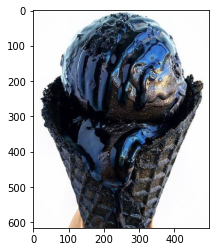

Cars = 5.233888153137371%
Ice cream cone = 90.460170682612%
Cricket ball = 4.305941164250627%
The predicted image is : Ice cream cone
Is the image a Ice cream cone ?(y/n)
y
Thank you for your feedback


In [ ]:

model=pickle.load(open('img_model.p','rb'))

url=input('Enter URL of Image ')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for your feedback")

*The URL used for the above example is https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQSQxhmybBg29I3iWeWAtlqO0D2Y_A65nhwW9E-OrGipYVL39woCkGzOspp&s=10*

**Task 1:** Apply SVM classifier for binary classification of rice type using the riceClassification.csv file provided to you. 

Implement SVM with all three kernels : linear, polynomial and RBF. Display and compare the accuracy/ change in accuracy when the kernel is changed.   

In [180]:
#Importing libraries
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

ricedataset = '/content/gdrive/MyDrive/CS306/database/numerical/riceClassification.csv' # google drive path where the dataset is stored 
rice = pd.read_csv(ricedataset) 
rice.shape
X = rice.iloc[:18184,[1,2,3,4,5,6,7,8,9,10]].values
y = rice.iloc[:18184,[11]].values
y=np.ravel(y,order='F')
C = 1.0 # SVM regularization parameter 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
#Linear implementation 
svc = svm.SVC(kernel='linear', C=C, max_iter= 10000).fit(X,y)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100}%")
print (rice.iloc[:18184,[11]])

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1635
           1       0.94      0.96      0.95      2002

    accuracy                           0.94      3637
   macro avg       0.94      0.94      0.94      3637
weighted avg       0.94      0.94      0.94      3637

Accuracy: 93.92356337640912%
       Class
0          1
1          1
2          1
3          1
4          1
...      ...
18179      0
18180      0
18181      0
18182      0
18183      0

[18184 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [ ]:
#Polynomial implementation 
svc = svm.SVC(kernel='poly', degree=3, C=C, max_iter= 10000).fit(X,y)
y_pred = svc.predict(X_test)
print(y_pred)
print(classification_report(y_test, y_pred))

print(f"Accuracy: {accuracy_score(y_test, y_pred)*100}%")



[1 1 1 ... 1 0 0]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1634
           1       0.91      0.98      0.94      2003

    accuracy                           0.94      3637
   macro avg       0.94      0.93      0.93      3637
weighted avg       0.94      0.94      0.93      3637

Accuracy: 93.53863073962057%


In [ ]:
#RBF implementation 
svc = svm.SVC(kernel='rbf', gamma=0.7, C=C, max_iter= 10000).fit(X,y)
y_pred = svc.predict(X_test)
print(y_pred)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100}%")


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[1 1 1 ... 0 0 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1634
           1       1.00      1.00      1.00      2003

    accuracy                           1.00      3637
   macro avg       1.00      1.00      1.00      3637
weighted avg       1.00      1.00      1.00      3637

Accuracy: 100.0%


**Task 2:** Binary classification of images using SVM. For this task you are given a database called PetImages2 on Canvas. The PetImages2 database folder contains two sub folders namely, 'Cat' and 'Dog'. Cat and Dog are our two classes. The Cat class (folder) contains 203 samples (images) and the Dog folder contains 203 samples (images). All the images are colour images and are of different resolutions. Your SVM classifier should achieve **at least 50%** accuracy using the given database.

Note: 

1. Store the data and model with the help of pickle module to ensure that the model training and evaluations is easier. 

2. Guideline blocks with some 'comments' are given below. You may use this to help define and solve the problem, or alternatively use a completely different approach. 

3. Your model should calculate and display the accuracy and show an output on a new unseen (testing) data. 

In [169]:
#Mounting the google drive/ ensuring that the Google drive has been mounted correctly 
from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [170]:
#Using os.path to access the database stored in the Google Drive. Then using Numpy array operations to ensure the data is in the desired format. 
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle

flat_data_arr = []
target_arr = []
Categories = ['Cat','Dog']

datadir= '/content/gdrive/MyDrive/CS306/database/image/petimage2'
for i in Categories:
  path= os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
flat_data = np.array(flat_data_arr)
target = np.array(target_arr)
df = pd.DataFrame(flat_data)
df['Target']=target
df




,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.145706,0.164209,0.150484,0.147667,0.164209,0.163353,0.149627,0.162497,0.176222,0.152444,...,0.190582,0.132614,0.104307,0.190719,0.139739,0.108366,0.171418,0.124359,0.091882,0
1,0.107562,0.123902,0.155131,0.068183,0.083869,0.119163,0.084281,0.099967,0.141961,0.140477,...,0.753366,0.755490,0.007843,0.723765,0.713529,0.014810,0.668706,0.649098,0.016765,0
2,0.869935,0.873856,0.854248,0.870281,0.874203,0.854595,0.866667,0.870588,0.850980,0.866667,...,0.831373,0.827451,0.813464,0.837137,0.827451,0.809686,0.839830,0.831373,0.819608,0
3,0.796732,0.643791,0.341830,0.809804,0.656863,0.354902,0.819608,0.666667,0.364706,0.832026,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.282686,0.995425,0.997425,0.281392,0.995118,0.995425,0.278922,0.995425,0.995425,0.267778,...,0.659706,0.993889,0.990163,0.669784,0.988928,0.986660,0.686392,0.992131,0.990503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,0.008680,0.045516,0.055739,0.011412,0.044745,0.055739,0.004972,0.029155,0.044444,0.000000,...,0.133333,0.152941,0.164706,0.133333,0.152941,0.164706,0.140523,0.160131,0.171895,1
402,0.400654,0.275817,0.071242,0.417647,0.296078,0.080882,0.445752,0.326634,0.093627,0.450490,...,0.454902,0.380392,0.262745,0.454902,0.380392,0.262745,0.454902,0.380392,0.262745,1
403,0.402778,0.383333,0.392157,0.369118,0.355882,0.368627,0.356373,0.351797,0.370915,0.377124,...,0.810458,0.778431,0.767320,0.707353,0.660294,0.656373,0.640686,0.593627,0.600327,1
404,0.747423,0.563290,0.398808,0.797294,0.609261,0.437523,0.811312,0.612370,0.433194,0.780547,...,0.753144,0.567612,0.475525,0.706830,0.540366,0.466196,0.596155,0.434965,0.401070,1


In [171]:
#using pickle module to store the formatted data as a data.pickle file. This ensures that the data formatting is not needed everytime. 
#dump --> serialize the object and convert it into a “byte stream” that we can save as a file called img_model.p 
#model= pickle.load(open('img_model.p','rb'))
pickle.dump(df, open('data.pickle','wb'))





In [172]:
# mapping the data to its label.

x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data



In [173]:
# performing train_test_split, dont forget the hint of keeping this low initially to ensure that the code is working fine before actually training. 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [174]:
# SVM model definition. Here we used C=1, kernel = polynomial and the gamma= auto. The model was then saved with the help of pickle module as model.sav
#Note this is the actual training step. Expect this step to take long. With the correct settings (e.g. test_data=0.2) it may take over 1 hr to train. 

C = 1.0 # SVM regularization parameter 

print("The training of the model is started, please wait for while as it may take few minutes to complete")
model = svm.SVC(C=1, kernel='poly', gamma= 'auto').fit(x_train,y_train)

# #model=svc.fit(x_train,y_train)

# pickle.dump(model, open('model.sav','wb'))
# print('The Model is trained well with the given images')






The training of the model is started, please wait for while as it may take few minutes to complete


In [175]:
# SVM model definition. Here we used C=1, kernel = polynomial and the gamma= auto. The model was then saved with the help of pickle module as model.sav
pickle.dump(model, open('model.sav','wb'))

In [176]:
# SVM model prediction using the test dataset. Use model.score to calculate and display the accuracy. 
model = pickle.load(open('model.sav','rb'))

score=model.score(x_test,y_test) 
#score=model.predict(x_test)
print("The accuracy is :")
score


The accuracy is :


0.5

**Step 7: Histogram of Oriented Gradients with Support Vector Machine (HOG-SVM) with multi-class classification** 










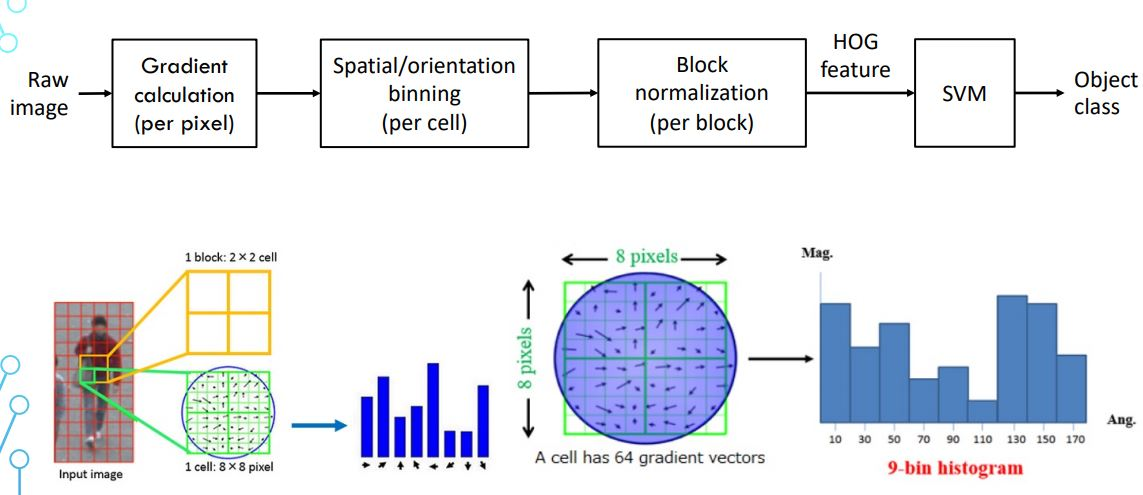

Consider the above figure taken from slide 15 of topic 7 from the lectures.
Here, Histogram of Oriented Gradients (HOG) feature descriptor extraction process is shown. 

In task 2, the images are used directly for training SVM and resulted in longer training time. If the number of samples in each of the class was more, then the training time would increase further because of the computational requirement to work at the pixel level of images.

There are many image processing methods to reduce the computational load and decrease the training time, and one such method is using Histogram of Oriented Gradients (HOG) for images combined with SVM.

Before we go into the details of HOG, we need to know about feature descriptors. Simply put, a feature descriptor is a representation of an image or an image patch that simplifies the image by extracting useful information and throwing away extraneous information.

Typically, a feature descriptor converts an image of size width x height x 3 (channels) to a feature vector / array of length n.

Working on feature vector is easier, faster and more efficient in terms of computational resource requirement. You will see that in the following example, we had an image with 31428 number of pixels and its corresponding number of  HOG features were only 4320. 

HOG method counts occurrences of gradient orientation in the localized portion of an image. This is quite similar to Edge Orientation Histograms and Scale Invariant Feature Transformation (SIFT) features used in signal processing. The HOG descriptor focuses on the structure or the shape of an object. It is better than any edge descriptor as it uses magnitude as well as angle of the gradient to compute the features. For the regions of the image, it generates histograms using the magnitude and orientations of the gradient.

We will mount the Google Drive and load a database downloaded from https://vcla.stat.ucla.edu/people/zhangzhang-si/HiT/exp5.html. The name of the database is 'LHI-Animal-Faces'. This database has 21 classes (folders) where each folder contains at least 100 images of that particular class type. For example, the cathead folder contains 160 images, eaglehead folder contains 101 images and so on. In the following step, we will implement a ulticlass SVM with 7 classes out of the 21 classes and use HOG feature descriptor to reduce the computational load.

We will use this database to predict if a given image belongs to one of the classes in the database. However, the difference from task 2 is that, we use HOG feature descriptor and perform SVM using the features of the image and not the image itself.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing all the header files

In [ ]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)

src contains the images belonging to the different classes and pklname is the path for the output files i.e. the location where the generated files would be stored.

In [ ]:
import joblib
from skimage.io import imread
from skimage.transform import resize
 
src='/content/drive/MyDrive/CS306/database/image/task3 lab4/Image'
pklname='/content/drive/MyDrive/CS306/database/image/task3 lab4/op'
#include=set[str]

def resize_all(src, pklname, include, width=150, height=None):
    

    height = height if height is not None else width
     
    data = dict()
    data['description'] = 'resized ({0}x{1})animal images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
 
    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)
 
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height)) #[:,:,::-1]
                    data['label'].append(subdir[:-4])
                    data['filename'].append(file)
                    data['data'].append(im)
 
        joblib.dump(data, pklname)

In [ ]:

import os
data_path = '/content/drive/MyDrive/CS306/database/image/task3 lab4/Image'
os.listdir(data_path)

['WolfHead',
 'TigerHead',
 'SheepHead',
 'RabbitHead',
 'PigHead',
 'PigeonHead',
 'PandaHead',
 'Natural',
 'MouseHead',
 'MonkeyHead',
 'LionHead',
 'HumanHead',
 'ElephantHead',
 'EagleHead',
 'DuckHead',
 'DogHead',
 'DeerHead',
 'CatHead',
 'CowHead',
 'ChickenHead',
 'BearHead']

The original dataset has many classes as seen above. For our example, we will consider 7 classes for simplicity.

In [ ]:
base_name = 'animal_faces'
width = 80
 
include = {'ChickenHead', 'BearHead', 'ElephantHead', 
           'EagleHead', 'DeerHead', 'MonkeyHead', 'PandaHead'}
 
resize_all(src=data_path, pklname=base_name, width=width, include=include)


PandaHead
MonkeyHead
ElephantHead
EagleHead
DeerHead
ChickenHead
BearHead


In [ ]:
import numpy as np
from collections import Counter

 
data = joblib.load(f'{base_name}_{width}x{width}px.pkl')
 
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

number of samples:  716
keys:  ['description', 'label', 'filename', 'data']
description:  resized (80x80)animal images in rgb
image shape:  (80, 80, 3)
labels: ['Bear' 'Chicken' 'Deer' 'Eagle' 'Elephant' 'Monkey' 'Panda']


Counter({'Panda': 117,
         'Monkey': 100,
         'Elephant': 100,
         'Eagle': 97,
         'Deer': 101,
         'Chicken': 100,
         'Bear': 101})

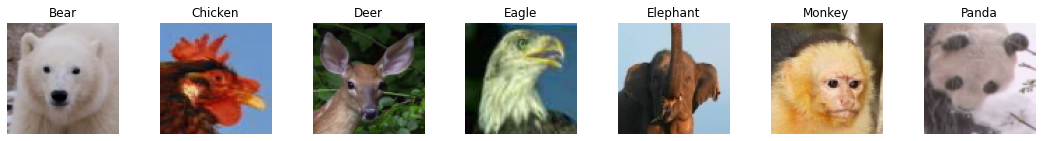

In [ ]:
import matplotlib.pyplot as plt
# use np.unique to get all unique values in the list of labels
labels = np.unique(data['label'])
 
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
     
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

In [ ]:
X = np.array(data['data'])
y = np.array(data['label'])

We will do a testing and training split of 80:20 where 80% of the data is reserved for traing and 20% is reserved for testing. When doing the train and test data split, it is also important to shuffle the dataset so that the train and test images are randomized and not biased towards any particular class.

In [ ]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

To verify that the distribution of images in the training and test set is similar, let’s look at the relative number of images per category by visualising it on a bar chart.

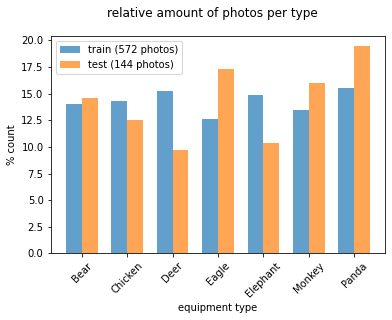

In [ ]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
 
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);

Now, we will use HOG before applying SVM on the above database. In the code below, an example image is displayed along with its corresponding HOG to better visualize what HOG does.

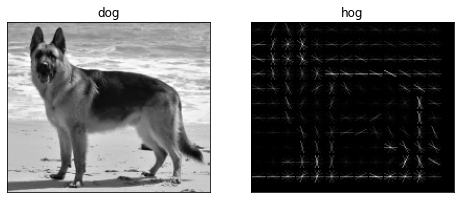

In [ ]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
 
dog = imread('/content/drive/MyDrive/CS306/database/image/task3 lab4/German_Shepherd_-_DSC_0346_(10096362833).jpg', as_gray=True)
# https://upload.wikimedia.org/wikipedia/commons/d/d0/German_Shepherd_-_DSC_0346_%2810096362833%29.jpg
 
# scale down the image to one third
dog = rescale(dog, 1/3, mode='reflect')
# calculate the hog and return a visual representation.
dog_hog, dog_hog_img = hog(
    dog, pixels_per_cell=(14,14), 
    cells_per_block=(2, 2), 
    orientations=9, 
    visualize=True, 
    block_norm='L2-Hys')
 
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
    for a in ax]
 
ax[0].imshow(dog, cmap='gray')
ax[0].set_title('dog')
ax[1].imshow(dog_hog_img, cmap='gray')
ax[1].set_title('hog')
plt.show()

In [ ]:
print('number of pixels: ', dog.shape[0] * dog.shape[1])
print('number of hog features: ', dog_hog.shape[0])

number of pixels:  31428
number of hog features:  4320


You can see that the number of HOG features are way less as compared to the number of pixels in the image.

In addition, scikit-learn comes with many built-in transformers, such as a StandardScaler to scale features and a Binarizer to map string features to numerical features. In addition, it provides the BaseEstimator and TransformerMixin classes to facilitate making your own Transformers.



In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
 
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])
     
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

In [ ]:

from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
 
# create an instance of each transformer
grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell=(14, 14), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()
 
# call fit_transform on each transform converting X_train step by step
X_train_gray = grayify.fit_transform(X_train)
X_train_hog = hogify.fit_transform(X_train_gray)
X_train_prepared = scalify.fit_transform(X_train_hog)
 
print(X_train_prepared.shape)

(572, 576)


The following block shows the SVM model definition. Observe the hyperparameters used.

In [ ]:
from sklearn. svm import SVC

sgd_clf = SVC(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)

SVC(max_iter=1000, random_state=42)

In [ ]:
X_test_gray = grayify.transform(X_test)
X_test_hog = hogify.transform(X_test_gray)
X_test_prepared = scalify.transform(X_test_hog)

In [ ]:
y_pred = sgd_clf.predict(X_test_prepared)
print(np.array(y_pred == y_test)[:25])
print('')
print('Percentage correct: ', 100*np.sum(y_pred == y_test)/len(y_test))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True]

Percentage correct:  91.66666666666667


We can see that the accuracy achieved when using HOG SVM for image classification is 91.66%

**Task 3: HOG-SVM implementation with parameter optimization.** 

Using the above example as a reference, implement a HOG-SVM classifier for the given image database 'Grapevine_Leaves_Image_Dataset'.

https://www.muratkoklu.com/datasets/ 

This database has been provided to you on Canvas for convenience. It has 5 classes with each class having at least 100 images. The 5 classes represent the different types of grapevine leaves.

In this task, use scikit learn SVM package to implement HOG-SVM.

Note: 

- You have to use each of the three kernel functions i.e. linear, polynomial, rbf.

- For each of the kernels, report training and test classification accuracy for the best value of regularization parameter C. The best value of C is the one which provides the best test accuracy. 
- Use the scikit learn link https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html to understand all the parameters the SVC function takes and optimize your SVM to achieve at least 70% accuracy.
- Report the accuracies in each case in the form of a table along with the respective value of C and kernel information and other hyperparameters tweaked. Use a text block in the end to comment in detail on your observations about the change in accuracy with respect to change in hyperparameters.

In [167]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)

import joblib
from skimage.io import imread
from skimage.transform import resize
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
 

#src= '/content/gdrive/MyDrive/CS306/database/image/Grapevine_Leaves_Image_Dataset'
#pklname='/content/drive/MyDrive/CS306/database/image/task3 lab4/op'
#include=set[str]

def resize_all(src, pklname, include, width=150, height=None):
    

    height = height if height is not None else width
     
    data = dict()
    data['description'] = 'resized ({0}x{1})animal images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
 
    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)
 
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height)) #[:,:,::-1]
                    data['label'].append(subdir[:-4])
                    data['filename'].append(file)
                    data['data'].append(im)
 
        joblib.dump(data, pklname)

data_path = '/content/gdrive/MyDrive/CS306/database/image/Grapevine_Leaves_Image_Dataset'
os.listdir(data_path)

base_name = 'Grapevine_names'
width = 80
 
include = {'Nazli','Dimnit','Buzgulu','Ala_Idris','Ak'}
resize_all(src=data_path, pklname=base_name, width=width, include=include)


data = joblib.load(f'{base_name}_{width}x{width}px.pkl')
 
# print('number of samples: ', len(data['data']))
# print('keys: ', list(data.keys()))
# print('description: ', data['description'])
# print('image shape: ', data['data'][0].shape)
# print('labels:', np.unique(data['label']))
# Counter(data['label'])

# # use np.unique to get all unique values in the list of labels
# labels = np.unique(data['label'])
 
# # set up the matplotlib figure and axes, based on the number of labels
# fig, axes = plt.subplots(1, len(labels))
# fig.set_size_inches(15,4)
# fig.tight_layout()
 
# # make a plot for every label (equipment) type. The index method returns the 
# # index of the first item corresponding to its search string, label in this case
# for ax, label in zip(axes, labels):
#     idx = data['label'].index(label)
     
#     ax.imshow(data['data'][idx])
#     ax.axis('off')
#     ax.set_title(label)

X = np.array(data['data'])
y = np.array(data['label'])

from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

from sklearn.base import BaseEstimator, TransformerMixin
 
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])
     
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])
            from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
 
# create an instance of each transformer
grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell=(14, 14), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()
 
# call fit_transform on each transform converting X_train step by step
X_train_gray = grayify.fit_transform(X_train)
X_train_hog = hogify.fit_transform(X_train_gray)
X_train_prepared = scalify.fit_transform(X_train_hog)
 
print(X_train_prepared.shape)

from sklearn. svm import SVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV

param_grid1={'C':[0.001, 0.01, 0.1, 1, 10, 100,1000]}
svc=svm.SVC(kernel='linear')
linear_clf = GridSearchCV(svc,param_grid1)
#linear_clf = SVC(kernel='linear', C=1.0, max_iter= 1000)
linear_clf.fit(X_train_prepared, y_train)
X_test_gray = grayify.transform(X_test)
X_test_hog = hogify.transform(X_test_gray)
X_test_prepared = scalify.transform(X_test_hog)
y_pred = linear_clf.predict(X_test_prepared)
#print(np.array(y_pred == y_test)[:25])
print('')
print('Percentage correct for linear kernel: ', 100*np.sum(y_pred == y_test)/len(y_test))
print(linear_clf.best_params_)


param_grid2={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1,10,100]}
svc=svm.SVC(kernel = 'poly')
poly_clf = GridSearchCV(svc,param_grid2)

#poly_clf = SVC(kernel='poly',  degree=1, C=1.0, max_iter= 1000)
poly_clf.fit(X_train_prepared, y_train)
X_test_gray = grayify.transform(X_test)
X_test_hog = hogify.transform(X_test_gray)
X_test_prepared = scalify.transform(X_test_hog)
y_pred = poly_clf.predict(X_test_prepared)
#print(np.array(y_pred == y_test)[:25])
print('')
print('Percentage correct for polynomial kernel: ', 100*np.sum(y_pred == y_test)/len(y_test))
print(poly_clf.best_params_)


param_grid3={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1,10,100]}
svc=svm.SVC(kernel = 'rbf')
rbf_clf = GridSearchCV(svc,param_grid3)

#rbf_clf = SVC(kernel='rbf', gamma='auto', C=10, max_iter= 1000)
rbf_clf.fit(X_train_prepared, y_train)
X_test_gray = grayify.transform(X_test)
X_test_hog = hogify.transform(X_test_gray)
X_test_prepared = scalify.transform(X_test_hog)
y_pred = rbf_clf.predict(X_test_prepared)
#print(np.array(y_pred == y_test)[:25])
print('')
print('Percentage correct for rbf kernel: ', 100*np.sum(y_pred == y_test)/len(y_test))
print(rbf_clf.best_params_)


from tabulate import tabulate
print(tabulate([['linear', 1.0,'x','x'], ['Poly', 1.0, 'auto',1],['rbf', 1.0,'auto','x']], headers=['Type', 'C', 'gamma','degree']))
print('auto for gamma reaches the highest accuracy, decreasing the degree of polynomial increases the accuracy')





Nazli
Dimnit
Buzgulu
Ala_Idris
Ak


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:118: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.


(400, 576)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:118: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.



Percentage correct for linear kernel:  47.0
{'C': 0.001}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:118: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.



Percentage correct for polynomial kernel:  52.0
{'C': 0.1, 'gamma': 0.1}

Percentage correct for rbf kernel:  61.0
{'C': 10, 'gamma': 0.001}
Type      C  gamma    degree
------  ---  -------  --------
linear    1  x        x
Poly      1  auto     1
rbf       1  auto     x
auto for gamma reaches the highest accuracy, decreasing the degree of polynomial increases the accuracy


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:118: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.


Which among the two options are **true** about the hyperparameter C.   

In [ ]:
Answer1 = "For larger value of C the optimization algorithm will choose a smaller-margin hyperplane. Smaller value of C would cause the optimizer to look for a larger margin hyperplane. " #@param ["For larger value of C the optimization algorithm will choose a smaller-margin hyperplane. Smaller value of C would cause the optimizer to look for a larger margin hyperplane. ", "For larger value of C the optimization algorithm will choose a larger-margin hyperplane. Smaller value of C would cause the optimizer to look for a smaller margin hyperplane. ","Changing the value of C would make no difference to the optimization algorithm. "] {allow-input: true}


Question 2: In SVM, which of the following is defined as a hyperplane?

In [ ]:
Answer2 = "Decision boundaries" #@param ["Features", "Datapoints", "Decision boundaries", "None of the above"] {allow-input: true}

Question 3: What determines the decision boundary in SVM?

In [ ]:
Answer3 = "The support vectors" #@param ["The support vectors", "All training data", "Half of the training data", "None of these"] {allow-input: true}


Question 4: Which of the following definitions best describes HOG?


In [ ]:
Answer4 = 'HOG, or Histogram of Oriented Gradients, is a feature descriptor that is often used to extract features from image data' #@param ["HOG, or History of Oriented Gradation is a sample descriptor that cannot extract any features.", "HOG, or Histogram of Oriented Gradients, is a feature descriptor that is often used to extract features from image data","Both of the above definitions are incorrect"] {allow-input: true}
